In [1]:
import pandas as pd
import numpy as np
import os
from mpl_toolkits.basemap import Basemap

In [2]:

def import_csv(archivo):
    data = pd.read_csv(archivo +'.csv', encoding = 'ISO-8859-1')
    return data

In [3]:
data1 = import_csv('FAO')
data1.head()

,Area Abbreviation,Area Code,Area,Item Code,Item,Element Code,Element,Unit,latitude,longitude,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
0,AFG,2,Afghanistan,2511,Wheat and products,5142,Food,1000 tonnes,33.94,67.71,...,3249.0,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895
1,AFG,2,Afghanistan,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,33.94,67.71,...,419.0,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422
2,AFG,2,Afghanistan,2513,Barley and products,5521,Feed,1000 tonnes,33.94,67.71,...,58.0,236.0,262.0,263.0,230.0,379.0,315.0,203.0,367,360
3,AFG,2,Afghanistan,2513,Barley and products,5142,Food,1000 tonnes,33.94,67.71,...,185.0,43.0,44.0,48.0,62.0,55.0,60.0,72.0,78,89
4,AFG,2,Afghanistan,2514,Maize and products,5521,Feed,1000 tonnes,33.94,67.71,...,120.0,208.0,233.0,249.0,247.0,195.0,178.0,191.0,200,200


In [4]:
def delete_columns(data,lista):
    deleted_columns = data.drop(lista, axis=1)
    return deleted_columns


lista1 = ["Area Abbreviation", "Area Code", "Item Code", "Element Code"]

data_cleaned = delete_columns(data1,lista1)
data_cleaned.head()


,Area,Item,Element,Unit,latitude,longitude,Y1961,Y1962,Y1963,Y1964,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
0,Afghanistan,Wheat and products,Food,1000 tonnes,33.94,67.71,1928.0,1904.0,1666.0,1950.0,...,3249.0,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895
1,Afghanistan,Rice (Milled Equivalent),Food,1000 tonnes,33.94,67.71,183.0,183.0,182.0,220.0,...,419.0,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422
2,Afghanistan,Barley and products,Feed,1000 tonnes,33.94,67.71,76.0,76.0,76.0,76.0,...,58.0,236.0,262.0,263.0,230.0,379.0,315.0,203.0,367,360
3,Afghanistan,Barley and products,Food,1000 tonnes,33.94,67.71,237.0,237.0,237.0,238.0,...,185.0,43.0,44.0,48.0,62.0,55.0,60.0,72.0,78,89
4,Afghanistan,Maize and products,Feed,1000 tonnes,33.94,67.71,210.0,210.0,214.0,216.0,...,120.0,208.0,233.0,249.0,247.0,195.0,178.0,191.0,200,200



def delete_rows(df,columna,item): 
    df = df.loc[df[columna] != item]
    return df

In [5]:
def delete_rows(df,column,item):    
    df = df.loc[df[column] != item]
    return df

nueva = delete_rows(data_cleaned,'Element','Feed')
nueva.head()

,Area,Item,Element,Unit,latitude,longitude,Y1961,Y1962,Y1963,Y1964,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
0,Afghanistan,Wheat and products,Food,1000 tonnes,33.94,67.71,1928.0,1904.0,1666.0,1950.0,...,3249.0,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895
1,Afghanistan,Rice (Milled Equivalent),Food,1000 tonnes,33.94,67.71,183.0,183.0,182.0,220.0,...,419.0,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422
3,Afghanistan,Barley and products,Food,1000 tonnes,33.94,67.71,237.0,237.0,237.0,238.0,...,185.0,43.0,44.0,48.0,62.0,55.0,60.0,72.0,78,89
5,Afghanistan,Maize and products,Food,1000 tonnes,33.94,67.71,403.0,403.0,410.0,415.0,...,231.0,67.0,82.0,67.0,69.0,71.0,82.0,73.0,77,76
6,Afghanistan,Millet and products,Food,1000 tonnes,33.94,67.71,17.0,18.0,19.0,20.0,...,15.0,21.0,11.0,19.0,21.0,18.0,14.0,14.0,14,12


In [6]:
def delete_letter_from_column(df,letra):
    df.columns = df.columns.str.replace(letra,'')
    return df

delete_letter_from_column(nueva,'Y')

,Area,Item,Element,Unit,latitude,longitude,1961,1962,1963,1964,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Wheat and products,Food,1000 tonnes,33.94,67.71,1928.0,1904.0,1666.0,1950.0,...,3249.0,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895
1,Afghanistan,Rice (Milled Equivalent),Food,1000 tonnes,33.94,67.71,183.0,183.0,182.0,220.0,...,419.0,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422
3,Afghanistan,Barley and products,Food,1000 tonnes,33.94,67.71,237.0,237.0,237.0,238.0,...,185.0,43.0,44.0,48.0,62.0,55.0,60.0,72.0,78,89
5,Afghanistan,Maize and products,Food,1000 tonnes,33.94,67.71,403.0,403.0,410.0,415.0,...,231.0,67.0,82.0,67.0,69.0,71.0,82.0,73.0,77,76
6,Afghanistan,Millet and products,Food,1000 tonnes,33.94,67.71,17.0,18.0,19.0,20.0,...,15.0,21.0,11.0,19.0,21.0,18.0,14.0,14.0,14,12
7,Afghanistan,"Cereals, Other",Food,1000 tonnes,33.94,67.71,0.0,0.0,0.0,0.0,...,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0
8,Afghanistan,Potatoes and products,Food,1000 tonnes,33.94,67.71,111.0,97.0,103.0,110.0,...,276.0,294.0,294.0,260.0,242.0,250.0,192.0,169.0,196,230
11,Afghanistan,Sugar (Raw Equivalent),Food,1000 tonnes,33.94,67.71,45.0,41.0,43.0,52.0,...,124.0,152.0,169.0,192.0,217.0,231.0,240.0,240.0,250,255
12,Afghanistan,"Sweeteners, Other",Food,1000 tonnes,33.94,67.71,0.0,0.0,0.0,0.0,...,9.0,15.0,12.0,6.0,11.0,2.0,9.0,21.0,24,16
13,Afghanistan,Honey,Food,1000 tonnes,33.94,67.71,2.0,2.0,2.0,2.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,2,2


In [20]:
def filter_item(df,columna,item): 
    df = df[df[columna] == item]
    return df

In [21]:
spain = filter_item(nueva,'Area','Spain')
spain

,Area,Item,Element,Unit,latitude,longitude,1961,1962,1963,1964,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
17819,Spain,Wheat and products,Food,1000 tonnes,40.46,-3.75,4101.0,4443.0,3849.0,3751.0,...,3700.0,3741.0,3749.0,3846.0,4055.0,4195.0,4256.0,4324.0,4411,4405
17821,Spain,Rice (Milled Equivalent),Food,1000 tonnes,40.46,-3.75,170.0,188.0,196.0,208.0,...,312.0,298.0,281.0,310.0,335.0,359.0,364.0,393.0,383,391
17823,Spain,Barley and products,Food,1000 tonnes,40.46,-3.75,0.0,0.0,0.0,0.0,...,1.0,1.0,2.0,3.0,7.0,4.0,4.0,1.0,2,17
17825,Spain,Maize and products,Food,1000 tonnes,40.46,-3.75,54.0,50.0,53.0,55.0,...,68.0,68.0,67.0,68.0,75.0,84.0,80.0,87.0,93,93
17827,Spain,Rye and products,Food,1000 tonnes,40.46,-3.75,85.0,110.0,103.0,101.0,...,38.0,38.0,47.0,37.0,40.0,40.0,40.0,40.0,40,45
17829,Spain,Oats,Food,1000 tonnes,40.46,-3.75,5.0,5.0,5.0,9.0,...,12.0,13.0,15.0,15.0,15.0,15.0,16.0,19.0,18,20
17832,Spain,Sorghum and products,Food,1000 tonnes,40.46,-3.75,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
17834,Spain,"Cereals, Other",Food,1000 tonnes,40.46,-3.75,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
17837,Spain,Potatoes and products,Food,1000 tonnes,40.46,-3.75,3849.0,3174.0,4009.0,3282.0,...,3054.0,2960.0,3037.0,2917.0,2840.0,2975.0,2959.0,2935.0,2913,2818
17839,Spain,Sweet potatoes,Food,1000 tonnes,40.46,-3.75,97.0,91.0,91.0,73.0,...,21.0,21.0,22.0,20.0,22.0,22.0,19.0,15.0,3,1


In [9]:

spain['Item'].unique()
spain.Item.value_counts()

Eggs                            2
Milk - Excluding Butter         2
Palmkernel Oil                  1
Yams                            1
Crustaceans                     1
Stimulants                      1
Beer                            1
Aquatic Plants                  1
Alcoholic Beverages             1
Roots, Other                    1
Pelagic Fish                    1
Rye and products                1
Coconut Oil                     1
Lemons, Limes and products      1
Potatoes and products           1
Fish, Body Oil                  1
Cream                           1
Offals, Edible                  1
Cocoa Beans and products        1
Sugar (Raw Equivalent)          1
Cephalopods                     1
Wine                            1
Sesame seed                     1
Marine Fish, Other              1
Demersal Fish                   1
Butter, Ghee                    1
Onions                          1
Bananas                         1
Rape and Mustardseed            1
Grapefruit and

In [24]:
spain = spain.groupby(['Item']).mean()
spain


,latitude,longitude,1961,1962,1963,1964,1965,1966,1967,1968,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Item,,,,,,,,,,,,,,,,,,,,,
Alcoholic Beverages,40.46,-3.75,2319.0,2357.0,2297.0,2687.0,2858.0,3008.0,3034.0,2914.0,...,5104.0,4944.0,5298.0,4965.0,4786.0,4685.0,4644.0,4636.0,4609,4626
Animal fats,40.46,-3.75,45.0,45.0,48.0,54.0,50.0,61.0,68.0,75.0,...,216.0,215.0,207.0,237.0,226.0,251.0,240.0,228.0,218,190
Apples and products,40.46,-3.75,180.0,180.0,169.0,165.0,142.0,202.0,186.0,238.0,...,680.0,685.0,499.0,555.0,561.0,568.0,526.0,505.0,472,486
"Aquatic Animals, Others",40.46,-3.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,26.0,26.0,29.0,17.0,24.0,8.0,29.0,40.0,3,3
Aquatic Plants,40.46,-3.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
"Aquatic Products, Other",40.46,-3.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,26.0,26.0,29.0,17.0,24.0,8.0,29.0,40.0,3,3
Bananas,40.46,-3.75,178.0,152.0,192.0,204.0,221.0,246.0,272.0,301.0,...,354.0,321.0,341.0,389.0,376.0,391.0,343.0,324.0,304,310
Barley and products,40.46,-3.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,2.0,3.0,7.0,4.0,4.0,1.0,2,17
Beans,40.46,-3.75,123.0,105.0,131.0,108.0,102.0,122.0,113.0,100.0,...,61.0,49.0,58.0,54.0,55.0,53.0,50.0,57.0,51,48


In [28]:
col_list = list(spain)
col_list.remove('latitude')
col_list.remove('longitude')
spain['suma'] = spain[col_list].sum(axis = 1)

spain




,latitude,longitude,1961,1962,1963,1964,1965,1966,1967,1968,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,suma
Item,,,,,,,,,,,,,,,,,,,,,
Alcoholic Beverages,40.46,-3.75,2319.0,2357.0,2297.0,2687.0,2858.0,3008.0,3034.0,2914.0,...,4944.0,5298.0,4965.0,4786.0,4685.0,4644.0,4636.0,4609,4626,860056.0
Animal fats,40.46,-3.75,45.0,45.0,48.0,54.0,50.0,61.0,68.0,75.0,...,215.0,207.0,237.0,226.0,251.0,240.0,228.0,218,190,29488.0
Apples and products,40.46,-3.75,180.0,180.0,169.0,165.0,142.0,202.0,186.0,238.0,...,685.0,499.0,555.0,561.0,568.0,526.0,505.0,472,486,121088.0
"Aquatic Animals, Others",40.46,-3.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,26.0,29.0,17.0,24.0,8.0,29.0,40.0,3,3,1024.0
Aquatic Plants,40.46,-3.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0
"Aquatic Products, Other",40.46,-3.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,26.0,29.0,17.0,24.0,8.0,29.0,40.0,3,3,1024.0
Bananas,40.46,-3.75,178.0,152.0,192.0,204.0,221.0,246.0,272.0,301.0,...,321.0,341.0,389.0,376.0,391.0,343.0,324.0,304,310,70440.0
Barley and products,40.46,-3.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,2.0,3.0,7.0,4.0,4.0,1.0,2,17,408.0
Beans,40.46,-3.75,123.0,105.0,131.0,108.0,102.0,122.0,113.0,100.0,...,49.0,58.0,54.0,55.0,53.0,50.0,57.0,51,48,16960.0


In [12]:
spain = spain.nlargest(10, ['suma'])

In [41]:
import matplotlib.pyplot as plt
spain = spain.reset_index()
spain.to_csv('spain_production.csv')

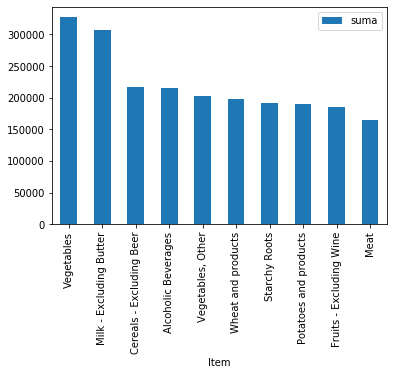

In [14]:

spain.plot(kind='bar', x = 'Item', y = 'suma')

In [17]:
nueva.head()
columns_list = ['Item']

,Area,Item,Element,Unit,latitude,longitude,1961,1962,1963,1964,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Wheat and products,Food,1000 tonnes,33.94,67.71,1928.0,1904.0,1666.0,1950.0,...,3249.0,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895
1,Afghanistan,Rice (Milled Equivalent),Food,1000 tonnes,33.94,67.71,183.0,183.0,182.0,220.0,...,419.0,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422
3,Afghanistan,Barley and products,Food,1000 tonnes,33.94,67.71,237.0,237.0,237.0,238.0,...,185.0,43.0,44.0,48.0,62.0,55.0,60.0,72.0,78,89
5,Afghanistan,Maize and products,Food,1000 tonnes,33.94,67.71,403.0,403.0,410.0,415.0,...,231.0,67.0,82.0,67.0,69.0,71.0,82.0,73.0,77,76
6,Afghanistan,Millet and products,Food,1000 tonnes,33.94,67.71,17.0,18.0,19.0,20.0,...,15.0,21.0,11.0,19.0,21.0,18.0,14.0,14.0,14,12


In [33]:
vegetables = filter_item(nueva,'Item','Vegetables')
vegetables = vegetables.groupby(['Area']).mean()
vegetables


,latitude,longitude,1961,1962,1963,1964,1965,1966,1967,1968,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Area,,,,,,,,,,,,,,,,,,,,,
Afghanistan,33.94,67.71,329.0,343.0,363.0,383.0,399.0,404.0,437.0,448.0,...,633.0,920.0,956.0,950.0,901.0,1056.0,977.0,865.0,910,885
Albania,41.15,20.17,120.0,123.0,148.0,157.0,153.0,106.0,105.0,104.0,...,593.0,594.0,605.0,587.0,650.0,636.0,748.0,791.0,796,778
Algeria,28.03,1.66,368.0,389.0,376.0,365.0,345.0,356.0,326.0,392.0,...,3902.0,3970.0,3801.0,3783.0,3707.0,4586.0,4983.0,5369.0,5884,6497
Angola,-11.20,17.87,153.0,155.0,158.0,162.0,163.0,166.0,169.0,173.0,...,375.0,360.0,411.0,393.0,892.0,1260.0,1320.0,1449.0,1375,1453
Antigua and Barbuda,17.06,-61.80,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,3.0,8.0,5.0,4.0,5.0,4.0,4.0,6.0,6,7
Argentina,-38.42,-63.62,1715.0,1770.0,1681.0,1808.0,1808.0,1811.0,1926.0,1864.0,...,2558.0,2715.0,2523.0,2654.0,2663.0,2636.0,2687.0,2868.0,3001,2858
Armenia,40.07,45.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,659.0,719.0,873.0,986.0,968.0,958.0,849.0,912.0,1016,1039
Australia,-25.27,133.78,646.0,657.0,654.0,683.0,719.0,787.0,786.0,791.0,...,2032.0,2008.0,2034.0,2118.0,2214.0,2138.0,2192.0,2180.0,2303,2400
Austria,47.52,14.55,473.0,434.0,542.0,516.0,550.0,540.0,518.0,532.0,...,836.0,767.0,785.0,797.0,849.0,848.0,888.0,922.0,879,881


In [42]:
col_list1 = list(vegetables)
col_list1.remove('latitude')
col_list1.remove('longitude')
vegetables['suma'] = vegetables[col_list1].sum(axis = 1)
vegetables

#vegetables.to_csv('production_vegetables.csv')

,latitude,longitude,1961,1962,1963,1964,1965,1966,1967,1968,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,suma
Area,,,,,,,,,,,,,,,,,,,,,
Afghanistan,33.94,67.71,329.0,343.0,363.0,383.0,399.0,404.0,437.0,448.0,...,920.0,956.0,950.0,901.0,1056.0,977.0,865.0,910,885,115016.0
Albania,41.15,20.17,120.0,123.0,148.0,157.0,153.0,106.0,105.0,104.0,...,594.0,605.0,587.0,650.0,636.0,748.0,791.0,796,778,75564.0
Algeria,28.03,1.66,368.0,389.0,376.0,365.0,345.0,356.0,326.0,392.0,...,3970.0,3801.0,3783.0,3707.0,4586.0,4983.0,5369.0,5884,6497,410952.0
Angola,-11.20,17.87,153.0,155.0,158.0,162.0,163.0,166.0,169.0,173.0,...,360.0,411.0,393.0,892.0,1260.0,1320.0,1449.0,1375,1453,73608.0
Antigua and Barbuda,17.06,-61.80,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,8.0,5.0,4.0,5.0,4.0,4.0,6.0,6,7,624.0
Argentina,-38.42,-63.62,1715.0,1770.0,1681.0,1808.0,1808.0,1811.0,1926.0,1864.0,...,2715.0,2523.0,2654.0,2663.0,2636.0,2687.0,2868.0,3001,2858,490396.0
Armenia,40.07,45.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,719.0,873.0,986.0,968.0,958.0,849.0,912.0,1016,1039,56136.0
Australia,-25.27,133.78,646.0,657.0,654.0,683.0,719.0,787.0,786.0,791.0,...,2008.0,2034.0,2118.0,2214.0,2138.0,2192.0,2180.0,2303,2400,290680.0
Austria,47.52,14.55,473.0,434.0,542.0,516.0,550.0,540.0,518.0,532.0,...,767.0,785.0,797.0,849.0,848.0,888.0,922.0,879,881,133288.0


/usr/lib/python3/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  # Remove the CWD from sys.path while we load stuff.


NameError: name 'ml' is not defined

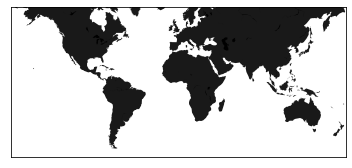

In [45]:
# Mercator of World (creation of worldmap)


m1 = Basemap(projection='merc',
            llcrnrlat=-60,
            urcrnrlat=65,
            llcrnrlon=-180,
            urcrnrlon=180,
            lat_ts=0,
            resolution='c')

m1.fillcontinents(color='#191919',lake_color='#000000') # dark grey land, black lakes
ml.
m1.drawmapboundary(fill_color='#000000') 
# black background
m1.drawcoastlines(color='gray')

m1.drawcountries(color='gray')
#m1.drawcountries(linewidth=0.1, color="w")   


# Draw the points and show the plot
m1.scatter(list(locations['longitude']), list(locations['latitude']), latlon = True, alpha = 0.7)
plt.show()

In [57]:
vegetables1 = vegetables.reset_index()
vegetables1 = vegetables.nlargest(15, ['suma'])
vegetables1

,Area,latitude,longitude,1961,1962,1963,1964,1965,1966,1967,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,suma
35,"China, mainland",35.86,104.20,52968.0,49318.0,43635.0,39097.0,41449.0,40808.0,41524.0,...,373694.0,388100.0,402975.0,425537.0,434724.0,451838.0,462696.0,479028,489299,36186376.0
73,India,20.59,78.96,16925.0,17664.0,18395.0,19054.0,19749.0,20590.0,21273.0,...,65549.0,74760.0,80659.0,83421.0,82568.0,91969.0,98339.0,104773,111082,9997600.0
165,United States of America,37.09,-95.71,17713.0,18628.0,17584.0,17462.0,18097.0,18321.0,19603.0,...,36668.0,37892.0,39116.0,35699.0,37686.0,37496.0,36650.0,37515,36472,6009964.0
81,Japan,36.20,138.25,9036.0,10188.0,11376.0,10975.0,11639.0,12413.0,12731.0,...,13692.0,13494.0,13341.0,13099.0,12814.0,12594.0,12899.0,13279,13006,2867904.0
158,Turkey,38.96,35.24,4204.0,4348.0,4538.0,4765.0,4807.0,4805.0,4957.0,...,16869.0,16458.0,16303.0,17183.0,16759.0,16378.0,17609.0,17689,18077,2278100.0
79,Italy,41.87,12.57,6642.0,6229.0,7159.0,7701.0,7916.0,8215.0,8176.0,...,10759.0,9462.0,9383.0,9181.0,10527.0,8959.0,8772.0,8149,7860,1952556.0
50,Egypt,26.82,30.80,3139.0,3500.0,3830.0,3945.0,4177.0,4514.0,4172.0,...,14663.0,16036.0,16679.0,17461.0,18820.0,16947.0,16370.0,17229,15891,1915548.0
75,Iran (Islamic Republic of),32.43,53.69,1289.0,1380.0,1502.0,1564.0,1627.0,1755.0,1855.0,...,15452.0,14845.0,15682.0,13082.0,16122.0,16425.0,18518.0,18679,19623,1586280.0
126,Republic of Korea,35.91,127.77,1954.0,2039.0,1952.0,2193.0,2335.0,2476.0,2643.0,...,10148.0,10598.0,10235.0,10667.0,10491.0,9520.0,10803.0,9691,10143,1549588.0
56,France,46.23,2.21,6952.0,6994.0,7049.0,6915.0,6996.0,6813.0,6941.0,...,6400.0,6038.0,6112.0,6305.0,6640.0,6516.0,6324.0,6288,6256,1380552.0


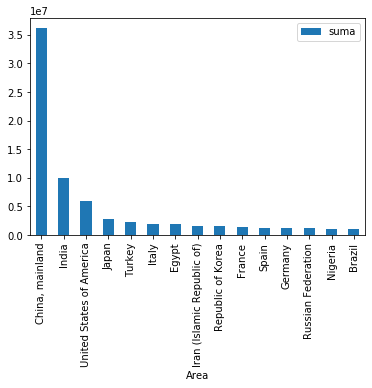

In [58]:
vegetables1.plot(kind='bar', x = 'Area', y = 'suma')

